In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [16]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<Axes: >

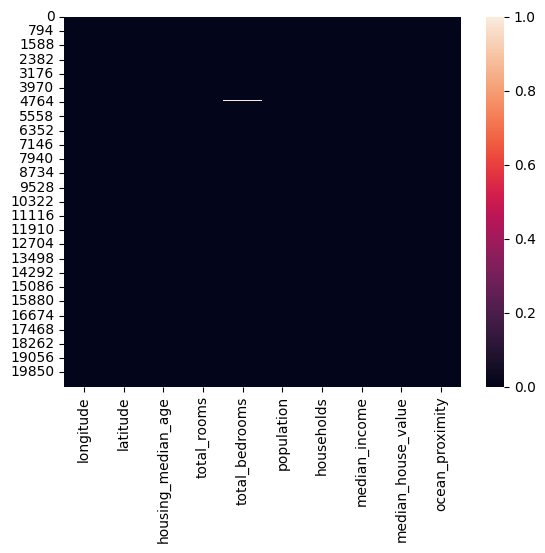

In [17]:
sns.heatmap(df.isnull())

<Axes: >

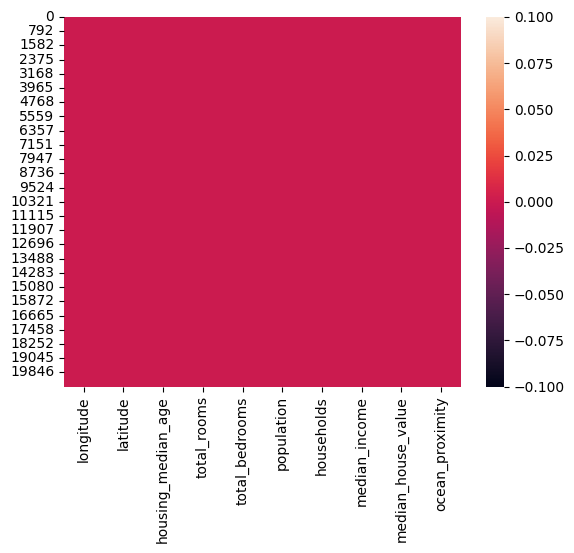

In [18]:
df.dropna(inplace=True)
sns.heatmap(df.isnull())

## Split data into train and test sets

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

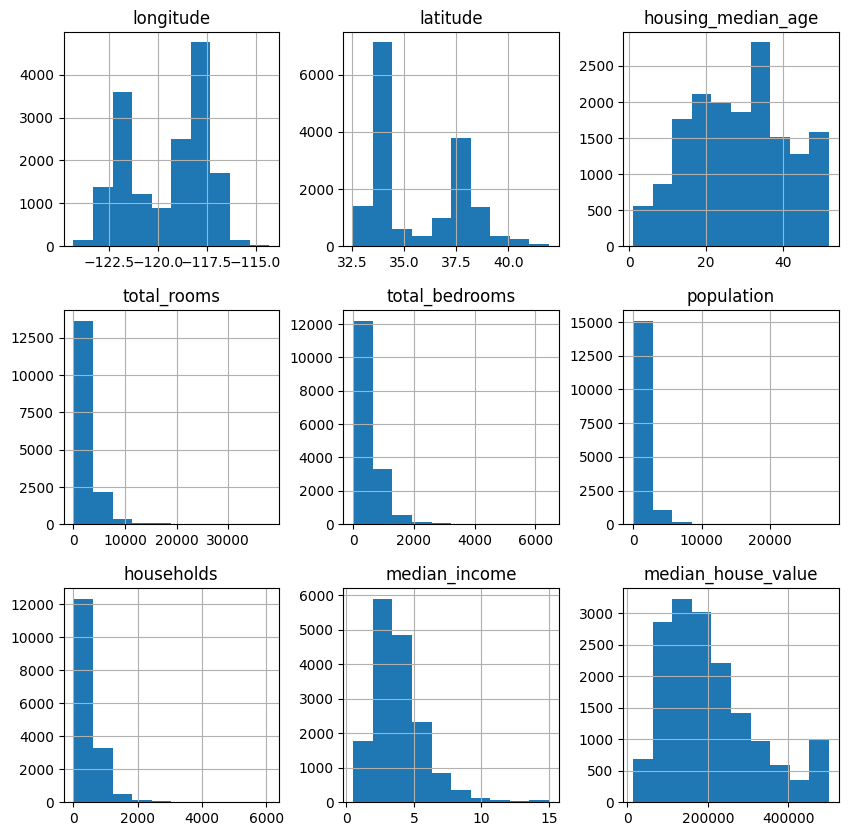

In [20]:
train_data = X_train.join(y_train)
train_data.hist(figsize=(10,10))

## Data correlation

<Axes: >

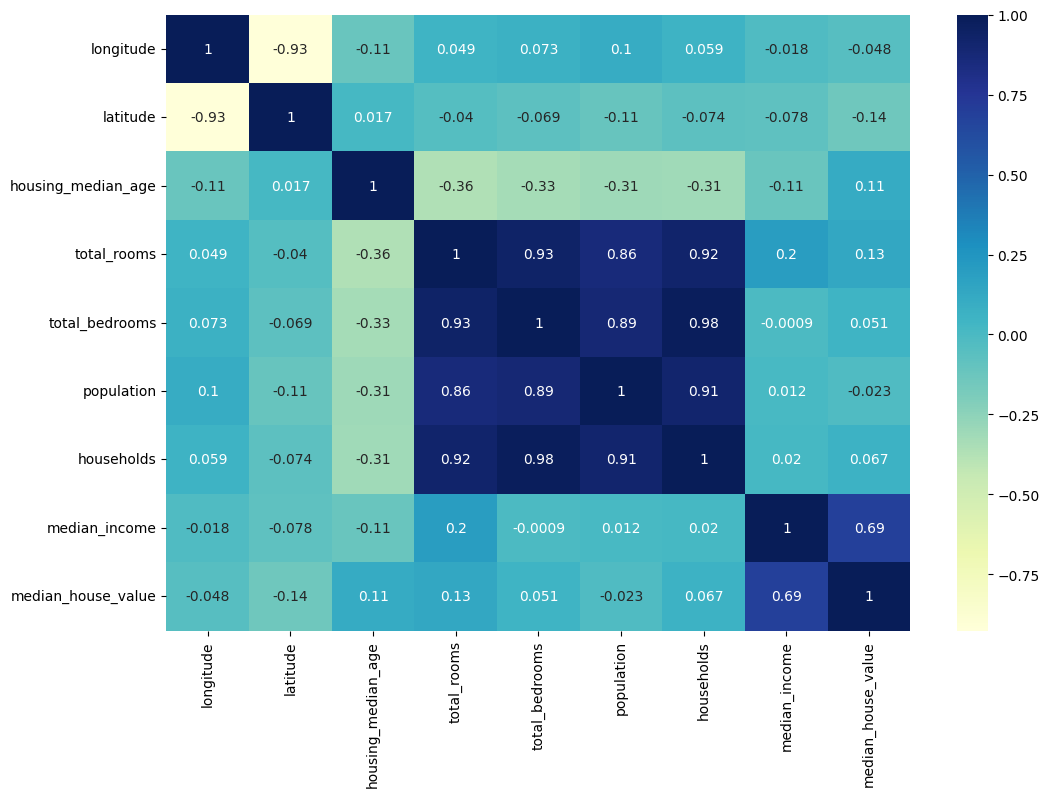

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [22]:
train_data.total_rooms = np.log(train_data.total_rooms + 1)
train_data.total_bedrooms = np.log(train_data.total_bedrooms + 1)
train_data.population = np.log(train_data.population + 1)
train_data.households = np.log(train_data.households + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

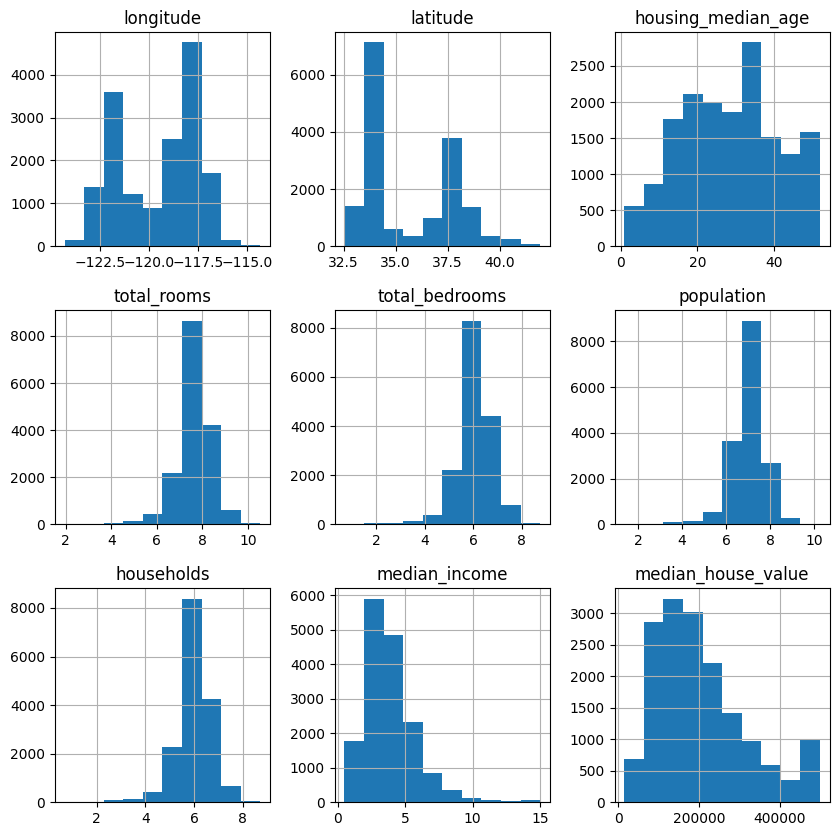

In [23]:
train_data.hist(figsize=(10,10))

In [24]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8355,-118.34,33.95,33.0,7.562162,6.131226,7.253470,5.891644,5.4359,194100.0,True,False,False,False,False
11636,-118.03,33.83,25.0,8.016648,6.278521,7.419980,6.234411,4.6250,229600.0,True,False,False,False,False
13727,-117.19,34.06,21.0,8.717355,7.352441,7.939515,7.275865,2.5643,102700.0,False,True,False,False,False
9136,-118.40,34.41,22.0,8.399310,6.329721,7.361375,6.208590,10.0285,500001.0,True,False,False,False,False
15090,-116.92,32.81,17.0,7.180070,5.978886,6.729824,5.823046,1.6686,112500.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,-122.64,38.95,28.0,7.315884,5.916202,6.259581,5.594711,1.2029,68900.0,False,True,False,False,False
3726,-118.42,34.18,30.0,7.188413,5.869297,6.753438,5.811141,3.3594,202200.0,True,False,False,False,False
12433,-116.01,33.51,24.0,8.001690,6.865891,8.304742,6.809039,1.7344,66400.0,False,True,False,False,False
11091,-117.89,33.82,18.0,8.070281,6.697034,7.546974,6.588926,3.6761,140500.0,True,False,False,False,False


<Axes: >

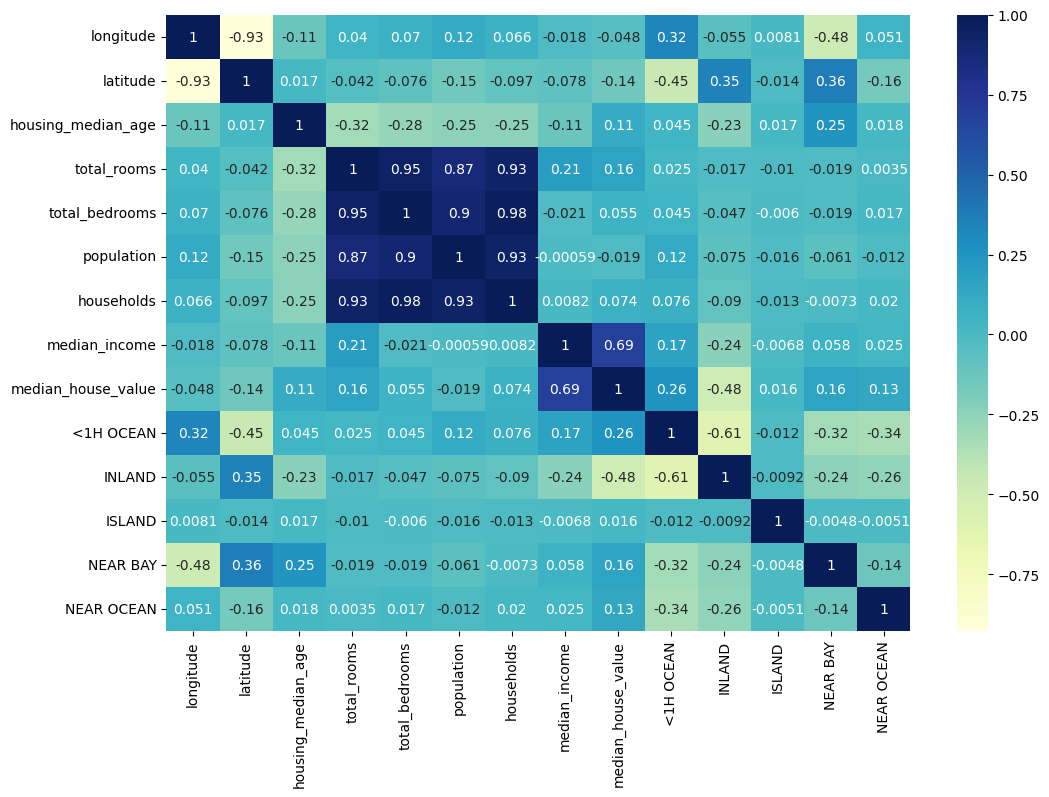

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

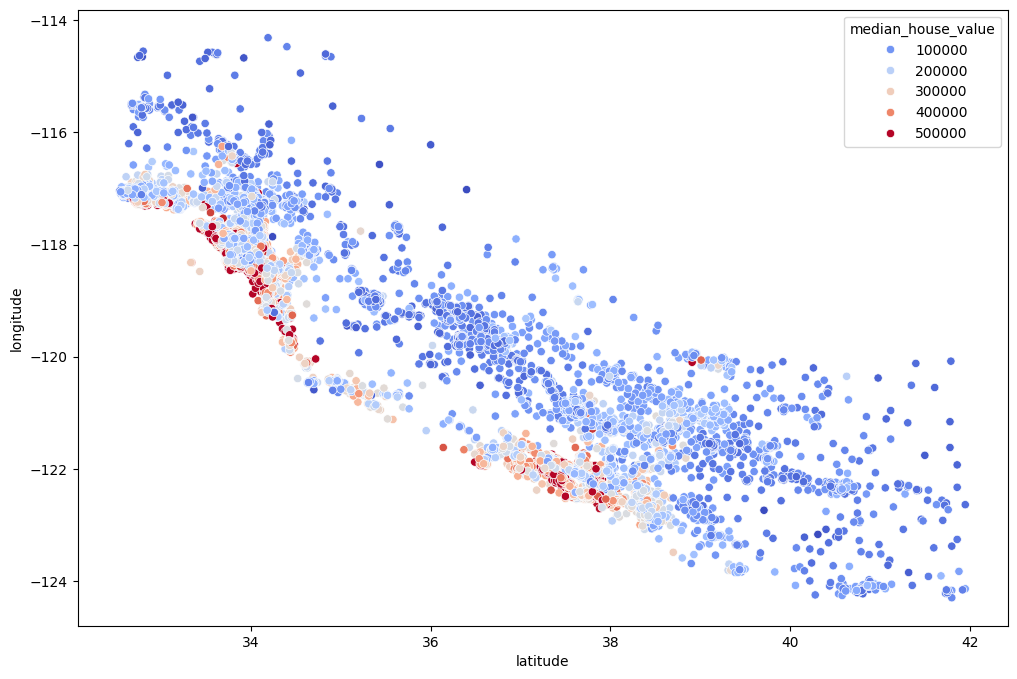

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

<Axes: >

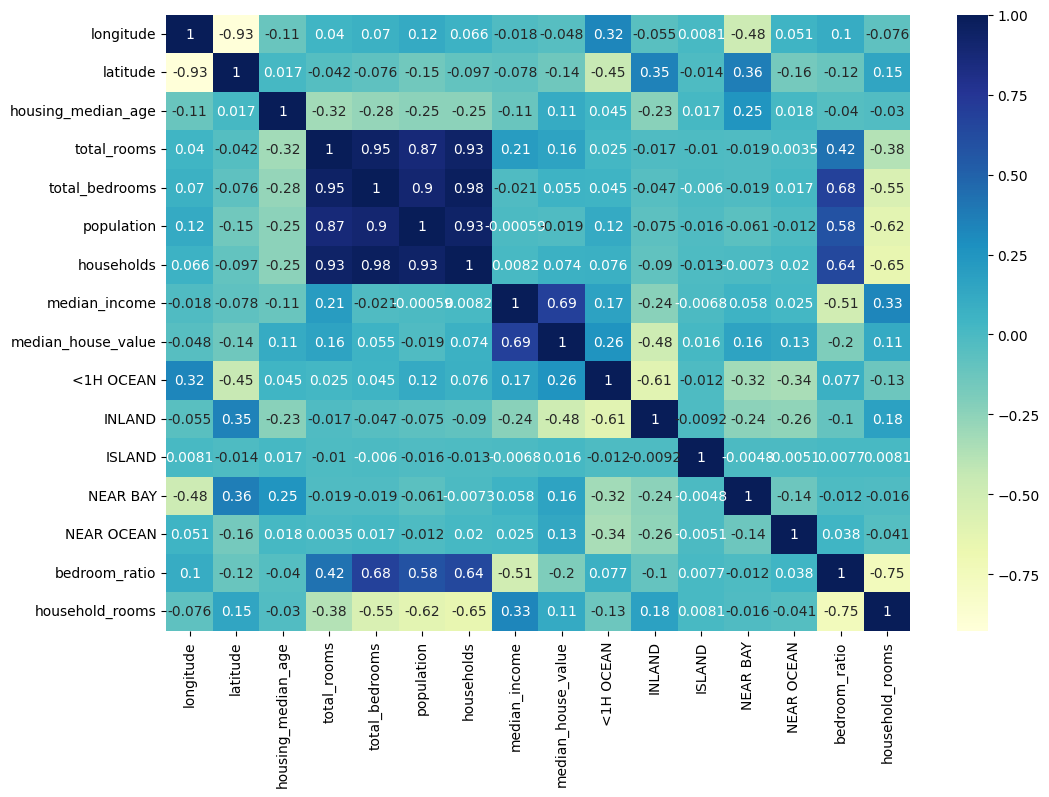

In [32]:
train_data['bedroom_ratio'] = train_data.total_bedrooms / train_data.total_rooms
train_data['household_rooms'] = train_data.total_rooms / train_data.households
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [33]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
test_data = X_test.join(y_test)

test_data.total_rooms = np.log(test_data.total_rooms + 1)
test_data.total_bedrooms = np.log(test_data.total_bedrooms + 1)
test_data.population = np.log(test_data.population + 1)
test_data.households = np.log(test_data.households + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data.total_bedrooms / test_data.total_rooms
test_data['household_rooms'] = test_data.total_rooms / test_data.households

In [36]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
7861,-118.14,33.90,39.0,7.229839,5.645447,6.784457,5.676754,3.3375,180100.0,True,False,False,False,False,0.780854,1.273587
8166,-118.13,33.80,36.0,7.311218,5.605802,6.612041,5.583496,4.4312,226000.0,True,False,False,False,False,0.766740,1.309434
20055,-119.12,35.85,37.0,6.602588,5.117994,6.336826,4.934474,2.4167,58300.0,False,True,False,False,False,0.775150,1.338053
14213,-117.05,32.69,21.0,6.899723,5.351858,6.545350,5.318120,3.6250,144300.0,False,False,False,False,True,0.775663,1.297399
63,-122.30,37.81,52.0,7.110696,5.472271,6.257668,5.075174,1.1910,76100.0,False,False,False,True,False,0.769583,1.401074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17241,-119.68,34.43,49.0,7.487734,5.958425,7.145196,5.942799,3.5208,251200.0,True,False,False,False,False,0.795758,1.259967
6711,-118.16,34.14,41.0,8.019613,6.180017,6.881411,6.102559,7.4817,500001.0,True,False,False,False,False,0.770613,1.314139
2932,-119.00,35.36,35.0,6.929517,5.638355,7.138073,5.480639,1.7375,48600.0,False,True,False,False,False,0.813672,1.264363
19199,-122.70,38.44,42.0,6.565265,5.209486,6.306275,5.153292,2.1912,165000.0,True,False,False,False,False,0.793492,1.273994
